In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
#shows the emojis of which five are 
#selected for this project
emoji.EMOJI_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':Afghanistan:': '🇦🇫',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧🇼',
 ':Bouvet_Island:': '🇧🇻',
 ':Brazil:': '🇧🇷',
 ':British_Indian_Ocean_Territory:': '🇮🇴',
 ':British_Virgin_Is

In [3]:
#Importing the datasets
train = pd.read_csv('dataset/train_emoji.csv',header=None)
test = pd.read_csv('dataset/test_emoji.csv',header=None)

In [4]:
#snapshot of dataset(first 5 rows)
train.head(n=5)

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [5]:
#emojis & its mappings considered in this project
mapping = { "0": "\u2764\uFE0F",   
            "1": ":baseball:",
            "2": ":beaming_face_with_smiling_eyes:",
            "3": ":downcast_face_with_sweat:",
            "4": ":fork_and_knife:",       }
for i in mapping.values():
    print(emoji.emojize(i),end="  ")

❤️  ⚾  😁  😓  🍴  

In [6]:
#Analyzing training data with emojis mapped
xtrain=train[0]
ytrain=train[1]
xtest=test[0]
ytest=test[1]
for i in range(10):
    print(xtrain[i],emoji.emojize(mapping[str(ytrain[i])]))

never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾


In [7]:
#dimension analysis of train-test data
#ie. number of rows & columns
#One-hot encoding on y-labels 
#since higher value emoji does not gives it more weightage
from keras.utils import to_categorical
xtrain=train[0]
ytrain=to_categorical(train[1])
xtest=test[0]
ytest=to_categorical(test[1])
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

Using TensorFlow backend.


(132,)
(56,)
(132, 5)
(56, 5)


In [8]:
print(list(train))

[0, 1, 2, 3]


In [9]:
#Sentence Tokenization
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize 
def tokens(data):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(data)
    #word_tokens = sent_tokenize(data)
    #print(word_tokens)
    return word_tokens

In [10]:
# Stopword removal
def stopword(word_token):
    stop_words = set(stopwords.words('english')) 
    #word_token = word_tokens.split()
    filtered_sentence = [w for w in word_token if not w in stop_words]
    filtered_sentence = []
    for w in word_token:
        if w not in stop_words:
            filtered_sentence.append(w)      
    #print(filtered_sentence)
    return(filtered_sentence)

In [11]:
# Stemming
def stemming(filtered_sentence):
    ps = PorterStemmer()
    word = [ps.stem(word) for word in filtered_sentence if not word in set(stopwords.words('english'))]
    return(word)  

In [12]:
# Cleaning text (data preprocessing) and Creating corpus
corpus=[]
for i in range(0, xtrain.shape[0]):
    wtokens = tokens(train[0][i].lower()) #Tokenization
    sent = stopword(wtokens) #Stopword removal
    word = stemming(sent) #Stemming
    word =' '.join(word)
    corpus.append(word)
print(corpus)

['never talk', 'proud achiev', 'worst day life', 'miss much', 'food life', 'love mum', 'stop say bullshit', 'congratul accept', 'assign long', 'want go play', 'answer text', 'stupid limit', 'mani point score', 'algorithm perform poorli', 'got approv', 'stop shout', 'sound like fun plan ha ha', 'one like', 'game finish', 'celebr soon', 'sad come', 'dearest love', 'good job', 'funni lol', 'candi life', 'chicago cub', 'hungri', 'excit see long', 'well exam', 'let brunch day', 'cute', 'dare ask', 'want join dinner', 'said ye', 'attract', 'suck', 'smile lot', 'laugh', 'take forev get readi', 'french macaroon tasti', 'made', 'excit', 'ador dog', 'congratul', 'girl mean', 'two cute', 'code work grader gave zero', 'joke kill haha', 'like pizza', 'got grade', 'miss', 'think end alon', 'got humili sister', 'aw', 'cook meat', 'funni', 'let exercis', 'best player', 'go stadium', 'incred intellig talent', 'stop shout', 'favorit player', 'like lot', 'miss', 'dog puppi', 'hate', 'want chines food', '

In [13]:
corpus=[]
for i in range(0, xtrain.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', train[0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['never talk', 'proud achiev', 'worst day life', 'miss much', 'food life', 'love mum', 'stop say bullshit', 'congratul accept', 'assign long', 'want go play', 'answer text', 'stupid limit', 'mani point score', 'algorithm perform poorli', 'got approv', 'stop shout', 'sound like fun plan ha ha', 'one like', 'game finish', 'celebr soon', 'sad come', 'dearest love', 'good job', 'funni lol', 'candi life', 'chicago cub', 'hungri', 'excit see long', 'well exam', 'let brunch day', 'cute', 'dare ask', 'want join dinner', 'said ye', 'attract', 'suck', 'smile lot', 'laugh', 'take forev get readi', 'french macaroon tasti', 'made', 'excit', 'ador dog', 'congratul', 'girl mean', 'two cute', 'code work grader gave zero', 'joke kill haha', 'like pizza', 'got grade', 'miss', 'think end alon', 'got humili sister', 'aw', 'cook meat', 'funni', 'let exercis', 'best player', 'go stadium', 'incred intellig talent', 'stop shout', 'favorit player', 'like lot', 'miss', 'dog puppi', 'hate', 'want chines food', '

In [14]:
#Creating the bag of words model
#Count based vector representation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(132, 191)


In [15]:
y = train.iloc[:, 1].values
print(y)

[3 2 3 0 4 0 3 2 3 1 3 3 1 3 2 3 2 3 1 2 3 0 2 2 2 1 4 2 2 4 0 3 4 2 0 3 2
 2 3 4 2 2 0 2 3 0 3 2 4 3 0 3 3 3 4 2 1 1 1 2 3 1 0 0 0 3 4 4 2 2 1 2 0 3
 2 2 0 0 3 1 2 1 2 2 4 3 3 2 4 0 0 0 3 3 3 2 0 1 2 3 0 2 2 2 3 2 2 2 4 1 1
 3 3 4 1 2 1 1 3 1 0 4 0 3 3 4 4 1 4 3 0 2]


In [16]:
#count-based vector approaches, to build a co-occurence matrix  
#and perform dimension reduction to obtain vectors out of it.
#In this project, I used GloVe vector, a pre-computed count-based representation, 
#to build embedding matrix of words in the glove vectorby the Stanford NLP group.
embeddings = {}
with open('glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')
        embeddings[word] = coeffs

In [17]:
def getOutputEmbeddings(X):
    k=X.shape[0]
    matrix= np.zeros((k,10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            matrix[ix][jx] = embeddings[X[ix][jx].lower()]        
    return matrix

In [18]:
xtrain_vec = getOutputEmbeddings(xtrain)
xtest_vec = getOutputEmbeddings(xtest)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
print(xtrain_vec.shape)
print(xtest_vec.shape)

(132, 10, 50)
(56, 10, 50)


In [20]:
#Training model using stacked LSTM Recurrent Neural Networks (Deep Learning)
from keras.layers import *
from keras.models import Sequential
#Initializing the classifier
cmodel = Sequential()
#Adding input layer and first hidden layer
cmodel.add(LSTM(64,input_shape=(10,50),return_sequences=True))
#Adding first dropout layer
cmodel.add(Dropout(0.4))
#Adding second hidden layer
cmodel.add(LSTM(64,input_shape=(10,50)))
#Adding second dropout layer
cmodel.add(Dropout(0.3))
cmodel.add(Dense(5))
#Using activation function
cmodel.add(Activation('softmax'))
cmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
__________________________________________________

In [21]:
#Compiling the RNN
cmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
#Fitting RNN to training set
cmodel.fit(xtrain_vec,ytrain,batch_size=32,epochs=35,shuffle=True,validation_split=0.1)

Train on 118 samples, validate on 14 samples
Epoch 1/35
118/118 [==============================] - 3s 22ms/step - loss: 1.5797 - acc: 0.2712 - val_loss: 1.5987 - val_acc: 0.3571
Epoch 2/35
118/118 [==============================] - 0s 532us/step - loss: 1.5217 - acc: 0.3475 - val_loss: 1.6195 - val_acc: 0.2857
Epoch 3/35
118/118 [==============================] - 0s 499us/step - loss: 1.4719 - acc: 0.4153 - val_loss: 1.6464 - val_acc: 0.1429
Epoch 4/35
118/118 [==============================] - 0s 516us/step - loss: 1.4495 - acc: 0.3729 - val_loss: 1.6031 - val_acc: 0.1429
Epoch 5/35
118/118 [==============================] - 0s 465us/step - loss: 1.3905 - acc: 0.4407 - val_loss: 1.5131 - val_acc: 0.2143
Epoch 6/35
118/118 [==============================] - 0s 490us/step - loss: 1.3112 - acc: 0.4746 - val_loss: 1.4197 - val_acc: 0.3571
Epoch 7/35
118/118 [==============================] - 0s 490us/step - loss: 1.2186 - acc: 0.5678 - val_loss: 1.3170 - val_acc: 0.5000
Epoch 8/35
118/118

In [22]:
#Validation loss & validation accuracy (during backpropagation)
los,acc=cmodel.evaluate(xtrain_vec,ytrain)
print("Validation loss and validation accuracy are respectively:",los,acc)

132/132 [==============================] - 0s 272us/step
Validation loss and validation accuracy are respectively: 0.1186052838509733 0.9469696879386902


In [23]:
#Predicting test results
pred = cmodel.predict_classes(xtest_vec)

In [26]:
#Mapping predicted value with its emoji :)
for i in range(56):
    print(' '.join(xtrain[i]))
    #print("Actual->",end=' ')
    #print(emoji.emojize(mapping[str(np.argmax(ytrain[i]))]))
    print("Predicted->",end=' ')
    print(emoji.emojize(mapping[str(pred[i])]))

never talk to me again
Predicted-> 🍴
I am proud of your achievements
Predicted-> 😓
It is the worst day in my life
Predicted-> 😓
Miss you so much
Predicted-> ❤️
food is life
Predicted-> 😁
I love you mum
Predicted-> 😁
Stop saying bullshit
Predicted-> 😓
congratulations on your acceptance
Predicted-> 😁
The assignment is too long
Predicted-> 🍴
I want to go play
Predicted-> 😁
she did not answer my text
Predicted-> ⚾
Your stupidity has no limit
Predicted-> 😁
how many points did he score
Predicted-> ❤️
my algorithm performs poorly
Predicted-> 😓
I got approved
Predicted-> ⚾
Stop shouting at me
Predicted-> 😓
Sounds like a fun plan ha ha
Predicted-> 😓
no one likes him
Predicted-> 😁
the game just finished
Predicted-> 😓
I will celebrate soon
Predicted-> 🍴
So sad you are not coming
Predicted-> ❤️
She is my dearest love
Predicted-> ❤️
Good job
Predicted-> 🍴
It was funny lol
Predicted-> ❤️
candy is life
Predicted-> 😓
The chicago cubs won again
Predicted-> 😓
I am hungry
Predicted-> 😁
I am so excited to

In [26]:
print(type(ytest))
print(type(pred))
print(ytest[1])
print(pred[1])
Ytest=np.argmax(ytest, axis=1)
print(Ytest[1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0. 0. 0. 1. 0.]
3
3


In [27]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
l = ['heart', 'baseball','smiley','sad_face','forks']
for i in l:
    print(i,end="  ")
print()
for i in mapping.values():
    print(emoji.emojize(i),end="       ")
print()
matrix = confusion_matrix(Ytest, pred)
print(matrix)

heart  baseball  smiley  sad_face  forks  
❤️       ⚾       😁       😓       🍴       
[[7 0 3 2 0]
 [0 5 0 0 0]
 [1 2 9 6 0]
 [2 0 3 9 1]
 [0 0 1 1 4]]


In [28]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

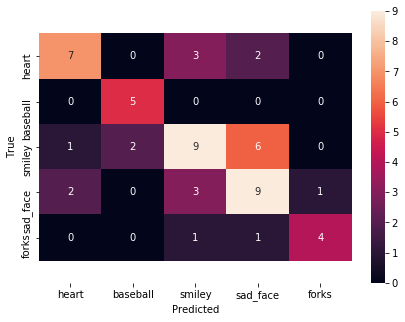

In [31]:
#Visualizing confusion matric by heatmaps with 56 rows in test set
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, fmt="d")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
#Classification report
print ('Accuracy Score :',accuracy_score(Ytest, pred)) 
print ('Report :')
print (classification_report(Ytest, pred))

Accuracy Score : 0.6071428571428571
Report :
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.71      1.00      0.83         5
           2       0.56      0.50      0.53        18
           3       0.50      0.60      0.55        15
           4       0.80      0.67      0.73         6

    accuracy                           0.61        56
   macro avg       0.66      0.67      0.65        56
weighted avg       0.61      0.61      0.60        56



In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Ytest, .62)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

ValueError: multiclass format is not supported